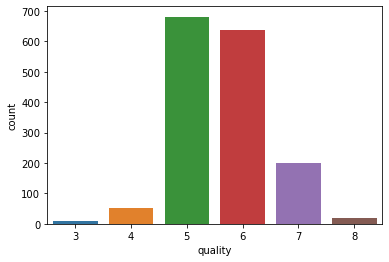

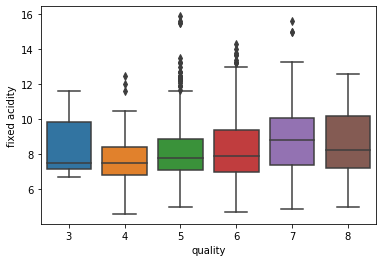

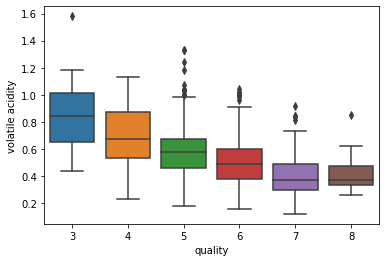

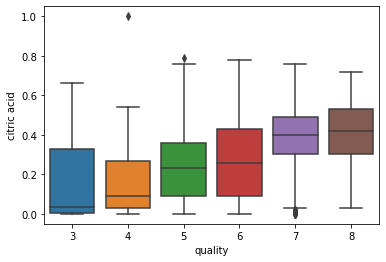

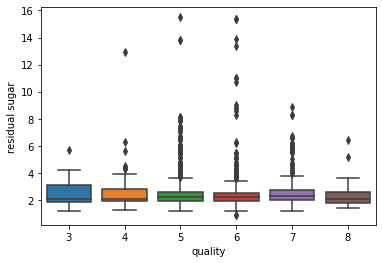

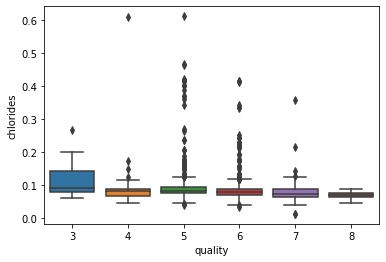

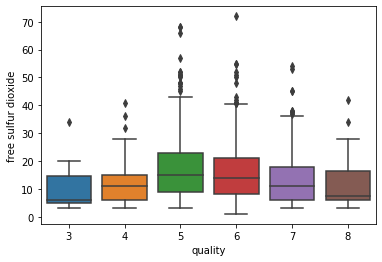

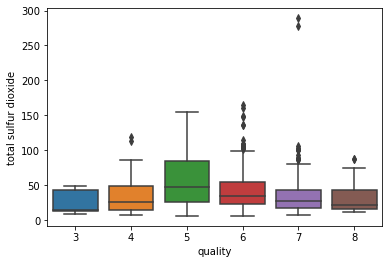

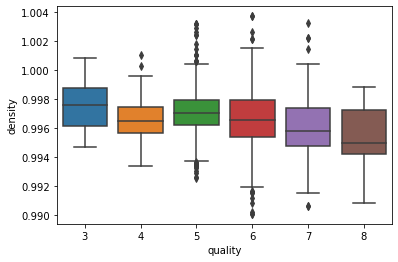

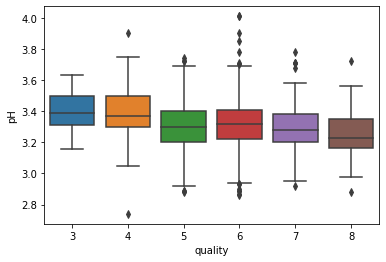

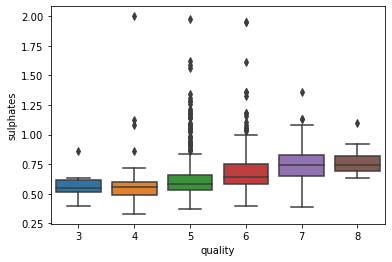

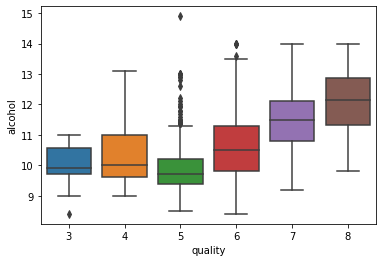

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

red_wines = pd.read_csv('winequality-red.csv')
red_wines.head()


X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

# Balans danych
sns.countplot(x='quality', data=red_wines)
plt.show()

# Analiza danych odstających
for column in X:
    sns.boxplot(x='quality', y=column, data=red_wines)
    plt.show()
